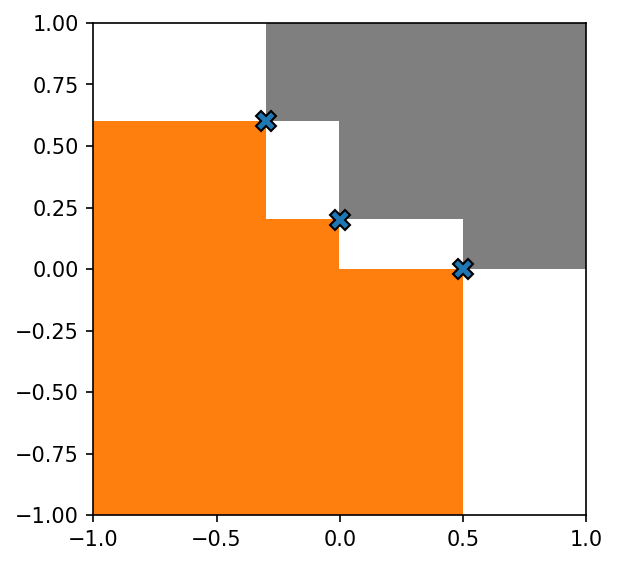

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def dominates(x,y):
    return (x <= y).all(axis=-1) & (x < y).any(axis=-1)

X = np.stack(np.meshgrid(np.linspace(-1,1, num=100), np.linspace(-1,1, num=100), indexing='xy'), -1)

p = np.array([
    # [0.3,-0.1],
    [0.5,0],
    [0.,0.2],
    [-0.3,0.6]
])

assert (~dominates(p[:,None],p[None,:])).all(), 'All points in p must not dominate each other'
Y = np.ones(X.shape[:2]) * np.nan
Y[dominates(p[:,None,None], X).any(0)] = 7/10
Y[dominates(X, p[:,None,None]).any(0)] = 1/10

ideal = p.min(0)

plt.figure(figsize=(4,4),dpi=150,facecolor='white',constrained_layout=True)
plt.plot(p[:,0], p[:,1], 'XC0',markeredgecolor='k',ms=10)
# plt.plot(*ideal, 'XC1',markeredgecolor='k',ms=10)
plt.imshow(
    Y,
    origin='lower', extent=[-1,1,-1,1],
    cmap='tab10', vmin=0, vmax=1
)
# plt.yticks([-1,0,1]);plt.xticks([-1,0,1]);